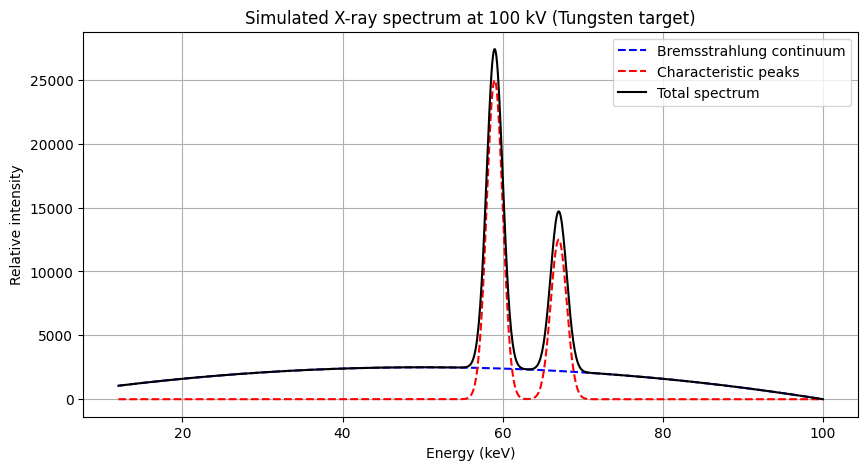

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- 参数 ----------------
Emax = 100  # 最大能量 (keV)
n_photons = int(1e6)  # 模拟光子数

# ---------------- 连续谱 (Kramers' law) ----------------
E = np.linspace(12, Emax, 1000)
spectrum_cont = (Emax - E) * E  # I(E) ∝ (Emax - E)·E
spectrum_cont[spectrum_cont < 0] = 0

# 归一化为概率分布
p_cont = spectrum_cont / np.sum(spectrum_cont) 

# ---------------- 特征峰 (例如钨靶 ~59 keV, ~67 keV) ----------------
def gaussian(x, mu, sigma, amp):
    return amp * np.exp(-(x-mu)**2/(2*sigma**2))

spectrum_peaks = (
    gaussian(E, 59, 1.0, 10*np.max(spectrum_cont)) +
    gaussian(E, 67, 1.0, 5*np.max(spectrum_cont))
)

# 合并谱
spectrum_total = spectrum_cont + spectrum_peaks
p_total = spectrum_total / np.sum(spectrum_total)

# ---------------- 从能谱采样光子能量 ----------------
energies = np.random.choice(E, size=n_photons, p=p_total)

# ---------------- 绘图 ----------------
plt.figure(figsize=(10,5))
plt.plot(E, spectrum_cont, 'b--', label="Bremsstrahlung continuum")
plt.plot(E, spectrum_peaks, 'r--', label="Characteristic peaks")
plt.plot(E, spectrum_total, 'k', label="Total spectrum")
# plt.hist(energies, bins=200, density=True, alpha=0.4, label="Sampled photons")
plt.xlabel("Energy (keV)")
plt.ylabel("Relative intensity")
plt.title("Simulated X-ray spectrum at 100 kV (Tungsten target)")
plt.legend()
plt.grid(True)
plt.show()
